##### Disclaimers 
This material is derived from **[scikit-learn-mooc](https://github.com/INRIA/scikit-learn-mooc)** under the fair-usage clause of `Creative Commons`.

*References to all the sources apart from the scikit-learn-mooc are linked*

### FOURTH SESSION

#### Intutions for Decision Trees 


We will introduce decision trees, both for classification and regression. Decision trees are useful to study because they are fundamental building blocks of very advanced and powerful methods, such as Random Forests and Gradient Boosted Trees. 


**What is a decision tree?**


![simple decison tree](../figures/DT/DT_simple_tree.png)

The above decision tree is for data that we saw before. And by just looking at the data, we could derive a set of decision rules from helping us classify people into different income groups. 

For instance, we could select the age variable of the person and tell whether or not the person is more than 28.5 years old. If they're younger, then we could predict a low income. 

And if it's higher, we have to consider a second variable, such as the number of hours per week that the person is working. And if it's lower than 40 hours per week, we could predict low income, and if it's higher, then a high income. 

*This set of hierarchical structures and decision rules based on one variable at a time is what we call a decision tree in machine learning.* 

And each time, we have two possible outcomes. 

For one given data point, we ask the question for each variable and then follow the arrows depending on the answer. When we reach a leaf node of the tree, we have the prediction for that specific data point. 

The trees have two kinds of nodes. A node could either be a root, decision, or split node because they split the data into two subsets. And the final nodes are called the leaves of the tree, the leaf nodes, and they hold the prediction values. 

**How do we train a decision tree?**

*Growing a Classification tree*

We now look at how to train decision trees automatically to find the structure and the value for the thresholds.

We have a small dataset with two groups of data points that can be either orange or blue. The goal is to predict the color, i.e., the class of the data point. 

And we have two input features, X0 and X1, and they are numerical variables or continuous variables for the input feature. We can represent them in a 2D space, in a plane. 

Here we start with the root, the decision node of the decision tree. The root node of the decision tree is to vertically split the dataset, meaning that we will select a value of X0 that can be taken anywhere in the range of possible values for X0. Here, the algorithm decides to take this specific value of X0, and then partition the training data into two subsets: what is on the left and what is on the right.

![classification decison tree](../figures/DT/DT_CT_1.png)

This simple decision tree will predict blue for the left child, for the left leaf node of the tree, after the split. Considering all the data points on the left, most of them are blue. And on the right side, you see the majority of the data points are orange. So it will predict orange. 

Alternatively, instead of predicting blue or orange, we could predict class probabilities. We count the number of blue data points on the right and the number of orange data points on the left and divide by the total number of data points on the left to output the probability. And we do the same for the right-hand side. 

<br>

Here you see that we haven't successfully partitioned the two groups after the first split. The probability is not precisely 1 for blue. It's something like 0.85. We can develop the tree further by considering this node, and instead of just predicting blue here, we can split this subset of the data and insert a new decision node in the tree. 

![classification decison tree](../figures/DT/DT_CT_2.png)

Here the optimal way to split this subset of the data is to horizontally split, this time using a threshold on X1, at a given position for X1. And in this case, you see that we've successfully separated all the blue points from the orange points. 

Now, we can make the final prediction, and those predictions have 100% accuracy on the training set. There is no prediction error on the training set for those two leaf nodes. We can do the same for the right-hand side because it's still not perfectly separated. 

![classification decison tree](../figures/DT/DT_CT_3.png)

We replace this leaf node with a decision node, a split node. Again, we split on X1 to find separation. Here, there is a specific value of X1 that allows us to separate the two groups with just one split completely. Automatically the algorithm selects the variable and the threshold value that makes it possible to separate the two groups best. 

<br>

On more complex datasets, you could imagine that we would need to grow a deeper tree to be able to separate the training set ideally. A quantity called the entropy or the Gini score makes it possible to quantify how good a split is. And automatically, the algorithm will find the best threshold value to maximize the improvement in the entropy after the split. 

<br>

*Growing a Regression tree*

Now we will use a similar idea but on a regression problem. Here, to simplify the representation, we consider only one input in the feature space X. And we have the target value, which is, this time, continuous. It's represented on the Y-axis here. 

And the black data points are the training data. So we have Y's value for each value of X, and we'll put a point here.

![regression decison tree](../figures/DT/DT_RT_1.png)


We start with the root node, a decision node, and a split. And as we have just one input variable.  

![regression decison tree](../figures/DT/DT_RT_2.png)

On the left-hand side of that split, we will compute the average value of the Y target variable for all the data points on the left concerning the X variable. And we compute the same average for all the points on the right. 

The prediction function of a regression model with just one split is just this step function, which is constant piecewise. So you see that this constant piecewise prediction function only loosely approximates the curvy shape. 

Here we can guess that the model is not fine enough to capture the data structure. We can refine this decision tree by splitting the leaf nodes further by making different decisions.  

![regression decison tree](../figures/DT/DT_RT_3.png)

If we introduce more and more splits, you see that each time we do a new split, we introduce a new leaf node, and the more leaf nodes you have, the more levels you can predict. And you see that progressively here, the green prediction function is starting to approximate the curvy shape of the training set. 

![regression decison tree](../figures/DT/DT_RT_4.png)

So, how deep should we grow the trees? Is it OK to go until the end? Or should we stop before splitting each data point in the training set? 

**Overfitting and Underfitting**


![regression decison tree](../figures/DT/DT_UF_OF.png)

Let's visualize to understand overfitting and underfitting in Decision Trees, where we have the training data points in black and the test data points in gray. We have many more data points in this case. 

When we keep the number of splits less, we can see that the model is underfitting. It cannot capture the structure of data — both on the training set and the test set. And because the training error is significant, the test error is also large, and we say that the model is underfitting.


And if we add many more leaf nodes, we can see that the curve is being refined, which can now successfully approximate the training data. And suppose we measure the average distance between the gray points and the prediction function. In that case, it is approximately the same as the average distance between the black points and the prediction function. It means that the test and train errors are approximately the same, which means that the model is not overfitting.


If we develop the tree further, we can make it such that at some point, all the black data points will be perfectly predicted by the decision tree. We can introduce as many leaves as we want such that, in the end, in each leaf of the tree, we will have one single training point. And if we do this, you can see that then. The prediction function has many small oscillations that perfectly fit the training data's noise. And when we do this, you see that this is causing overfitting.


**Summary**

![regression decison tree](../figures/DT/DT_S.png)

Decision trees are just a simple sequence of decision rules: at each time, we select one variable and one threshold value for the variable, and we split the data into two subsets based on this threshold. 

And for each subset, we can split again and again and again. 


And so, at prediction time, we start from the root, and we follow all the decision functions left or right until we reach one of the leaves of the tree, and we make the prediction based on the leaf value. 


The leaf values can either be for classification probabilities, the fraction of the colors observed on a training set that reached that specific leaf value, or the average value for regression. 

Decision trees are great when we work with tabular data, especially numerical features, because it's not essential to scale the numerical features to approximately the same scale. And even if features are on different scales and decision trees do not care about this. They are well-suited for this kind of tabular data with heterogeneous-typed variables. Here, we consider one feature at a time, and we find the optimal threshold for that feature at a time. 

If we grow the tree too deep, then we have the problem of overfitting. Therefore, it's often recommended to try to tune this hyperparameter of the maximum depth to find a trade-off between underfitting and overfitting. 


Please note that individual decision trees are usually too coarse in their decision function because they are constant piecewise predictors and are usually too limiting, even for the best optimal trade-off for the best depth. Decision trees are not very good individually, and they are only helpful when used as a building block for more powerful models. These models are called "ensemble of models," such as "Random Forests" and "Gradient Boosted Trees," which are often the best models that you can fit on tabular datasets. 



#### QUIZ 1


**1. To which kind of supervised learning tasks decision trees can be applied to:** 

a) classification tasks

b) regression tasks

c) clustering tasks

<br>

**2. A given split node in a decision tree classifier makes:** 

a) a binary decision considering a single feature at a time

b) a binary decision considering a combination of all the input features

c) multiple binary decisions considering a single feature

d) a binary decision considering a non-linear combination of all input features

<br>

**3. Which aspect of the decision tree learning procedure is most typically used to control the underfitting/overfitting trade-off?** 

a) The number of children of a split node

b) The magnitude of the weight coefficients

c) The maximum depth of the decision tree

#### Classification with decision trees 

Using the penguin's dataset, we will illustrate how decision trees fit data with a simple classification problem.

We have two input features, i.e., "Culmen Length (mm)" and "Culmen Depth (mm)," and our target is the "Species" of penguins. 


We learned that a linear classifier would define a linear separation to split classes using a linear combination of the input features. 
In our 2-dimensional space, i.e., for two input features, a linear classifier will define some oblique lines that best separate our classes. 

We use a simple `train_test_split` to split our data into two buckets, one used for training and the other used for testing.

We first apply the `LogisticRegression` to the train data and plot the decision boundaries learned by the classifier, which indicate where the model changes its prediction from one class to another.

We will see how these lines combine the input features since they are not perpendicular to a specific axis. 

Indeed, this is due to the model parametrization that we learned previously and is controlled by the model's weights and intercept.


Unlike linear models, decision trees are non-parametric models, i.e., they are not controlled by a mathematical decision function. They do not have weights or intercept to be optimized. Thus, decision trees will partition the space by considering a single feature at a time. 

We first use a decision tree with the `max_depth` flag as 1, then change this value to 2.

When we use the `max_depth` as 1, we will see with help from the plotting decision boundary that the decision tree does a single split to partition the feature space. The partitions found by the algorithm separate the data along the axis "Culmen Depth," discarding the feature "Culmen Length." 
This simple experiment highlights that a decision tree does not use a feature combination when doing a split. 

But when we use the `max_depth` as 2 we will use both "Culmen Length (mm)" and "Culmen Depth (mm)". Although "Culmen Length (mm)" and "Culmen Depth (mm)" will not be used "together," but applied to filter further the classes based on added criteria, i.e., "Culmen Depth (mm)".


In [43]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"


In [44]:
from sklearn.model_selection import train_test_split


data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    random_state=42
)



In [45]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()

linear_model.fit(
    data_train,
    target_train
)

test_score = linear_model.score(
    data_test,
    target_test
)

print(f"Accuracy of the LogisticRegression: {test_score:.2f}")

Accuracy of the LogisticRegression: 0.98


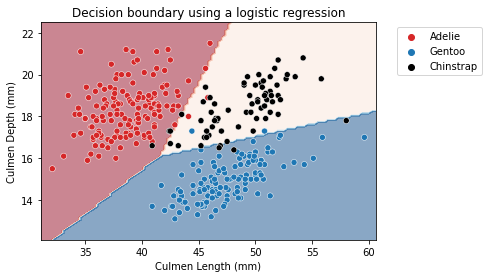

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils import DecisionBoundaryDisplay

# create a palette to be used in the scatterplot
palette = ["tab:red", "tab:blue", "black"]

DecisionBoundaryDisplay.from_estimator(
    linear_model,
    data_train,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)

sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette
)

# put the legend outside the plot
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

_ = plt.title("Decision boundary using a logistic regression")

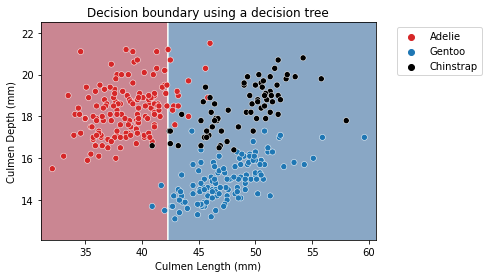

In [47]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    max_depth=1
)

tree.fit(
    data_train,
    target_train
)

DecisionBoundaryDisplay.from_estimator(
    tree,
    data_train,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)

sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette
)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

_ = plt.title("Decision boundary using a decision tree")


**Note**

The partitions found by the algorithm separates the data along the axis "Culmen Length", discarding the feature "Culmen Depth". Thus, it highlights that a decision tree does not use a combination of feature when making a split. 

When we look at the tree structure we see that the split was done on the culmen length feature. 

The original dataset was subdivided into 2 sets based on the culmen length (inferior or superior to 42.35 mm).

This partition of the dataset minimizes the class diversities in each sub-partitions.
 
This measure is also known as a **criterion**, and is a settable parameter.

If we look more closely at the partition, we see that the sample inferior to 42.35 belongs mainly to the Adelie class. 


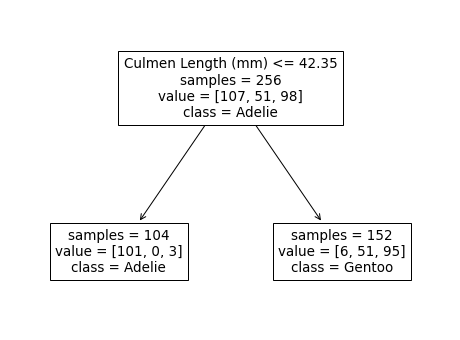

In [48]:


from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))

_ = plot_tree(
    tree,
    feature_names=culmen_columns,
    class_names=tree.classes_,
    impurity=False,
    ax=ax
)

In [49]:
# higher value of Culmen Depth doesn't matter 
sample_1 = pd.DataFrame(
    {"Culmen Length (mm)": [15], "Culmen Depth (mm)": [100]}
)
tree.predict(sample_1)

array(['Adelie'], dtype=object)

In [50]:
sample_2 = pd.DataFrame(
    {"Culmen Length (mm)": [49], "Culmen Depth (mm)": [17]}
)
tree.predict(sample_2)

array(['Gentoo'], dtype=object)

In [51]:
"""

We can conclude that a decision tree classifier will predict the most 
represented class within a partition.

During the training, we have a count of samples in each partition, 
we can also compute the probability of belonging to a specific class within this partition.

"""

y_pred_proba = tree.predict_proba(
    sample_2
)
y_proba_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)
print(f"probablities produced by tree {y_proba_class_0}\n")

adelie_proba = 6 / 152
chinstrap_proba = 51 / 152
gentoo_proba = 95 / 152

print(
    f"Probabilities for the different classes:\n"
    f"Adelie: {adelie_proba:.3f}\n"
    f"Chinstrap: {chinstrap_proba:.3f}\n"
    f"Gentoo: {gentoo_proba:.3f}\n"
)

probablities produced by tree Adelie       0.039474
Chinstrap    0.335526
Gentoo       0.625000
dtype: float64

Probabilities for the different classes:
Adelie: 0.039
Chinstrap: 0.336
Gentoo: 0.625



In [52]:
# and the probablilies remain same even for much higher value of Culmen Length
sample_3 = pd.DataFrame(
    {"Culmen Length (mm)": [10_000], "Culmen Depth (mm)": [17]}
)

tree.predict_proba(sample_3)

array([[0.03947368, 0.33552632, 0.625     ]])

In [53]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.73


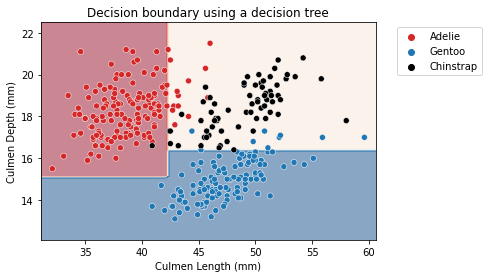

In [54]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train, target_train)

DecisionBoundaryDisplay.from_estimator(
    tree,
    data_train,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)

sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette
)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

_ = plt.title("Decision boundary using a decision tree")

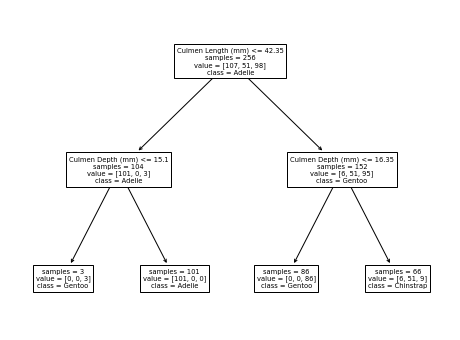

In [55]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))

_ = plot_tree(
    tree,
    feature_names=culmen_columns,
    class_names=tree.classes_,
    impurity=False,
    ax=ax
)

In [56]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.92


#### QUIZ 2

**1. For a decision tree built in scikit-learn, a split:**

a) will use a single feature to create a rule

b) will use a combination of the features to create a rule

c) will create multiple separations, one for each class

<br>

**2. Trees are built incrementally:**

a) by splitting data over and over

b) by refining the rules of each node

c) by refining the rules of each leaf

<br>

**3. A decision tree split is built:**

a) using a random threshold

b) using the median value of a single feature as a threshold

c) using a threshold that minimizes an error



#### Decision tree for regression

Now we will see how decision trees work in regression problems. 

We will see the differences with the decision trees previously presented in a classification setting.

We will use the penguins' dataset specifically for solving a regression problem.

To illustrate how decision trees predict in a regression setting, we will create a synthetic dataset containing all possible flipper lengths from the minimum to the maximum of the original data. We will call this data test data. Though this data is not created via `train_test_split` methodologically, it is valid naming because our objective is to understand the shape of the decision function of the learned decision trees. However, computing an evaluation metric on such a synthetic test set would be meaningless since the synthetic dataset does not follow the same distribution as the real-world data once deployed.

We will start with a simple non-regularized `LinearRegression` which will be able to fit the data. A feature of this model is that all new predictions will be on the line.

Contrary to linear models, decision trees are non-parametric models: they do not make assumptions about how data is distributed, which affects the prediction scheme. Repeating the experiment of `LinearRegression` with Decision Trees will elaborate on this. 


We see that the decision tree model does not have an *a priori* distribution for the data, and we do not end up with a straight line to regress flipper length and body mass.

Instead, we observe that the predictions of the tree are piecewise constant, and thus our feature space was split into two partitions. 

We will plot the tree structure to see what threshold was found during the training.


Eventually, we will see how increasing the depth of the tree will increase the number of partitions and thus the number of constant values that the tree is capable of predicting.



In [57]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

In [58]:
import numpy as np

data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()), 
    columns=[feature_name]
)


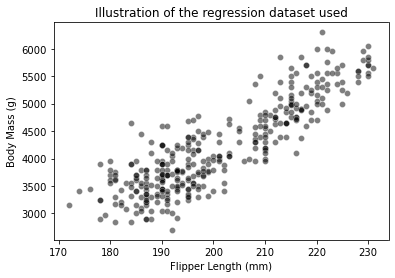

In [59]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)
_ = plt.title("Illustration of the regression dataset used")

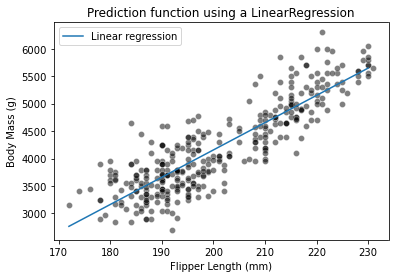

In [60]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(
    data_train,
    target_train
)
target_predicted = linear_model.predict(
    data_test
)

sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Linear regression"
)

plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

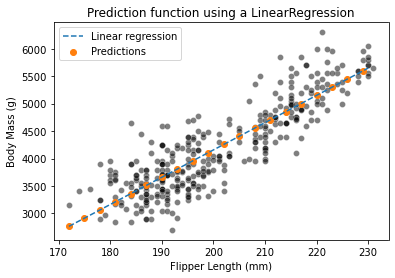

In [61]:
ax = sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Linear regression",
    linestyle="--"
)

plt.scatter(
    data_test[::3],
    target_predicted[::3],
    label="Predictions",
    color="tab:orange"
)

plt.legend()

_ = plt.title("Prediction function using a LinearRegression")

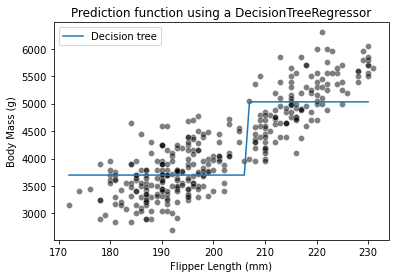

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    max_depth=1
)

tree.fit(
    data_train,
    target_train
)

target_predicted = tree.predict(
    data_test
)

sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Decision tree"
)

plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

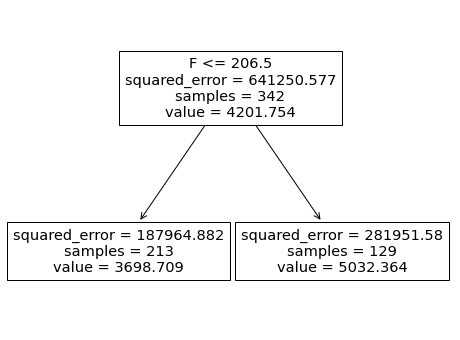

In [63]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(
    figsize=(8, 6)
)
_ = plot_tree(
    tree,
    feature_names=feature_name,
    ax=ax
)

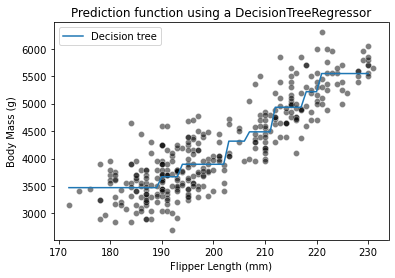

In [64]:
tree = DecisionTreeRegressor(
    max_depth=3
)

tree.fit(
    data_train,
    target_train
)

target_predicted = tree.predict(
    data_test
)

sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Decision tree"
)

plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

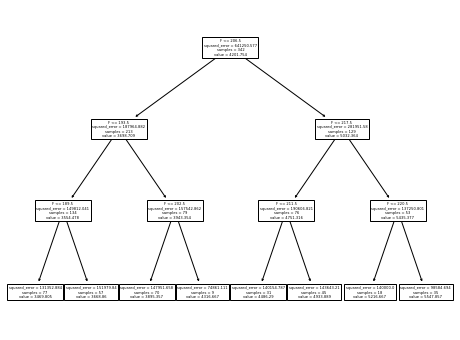

In [65]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(
    tree,
    feature_names=feature_name,
    ax=ax
)

#### QUIZ 3

**1. When fitting a decision tree regressor in scikit-learn, the predicted values on a leaf correspond to:**


a) the median of the training samples at this node

b) the mean of the training samples at this node

c) the most frequent value of the training samples at this node

<br>

**2. Decision trees are capable of:**

a) interpolating and extrapolating

b) only interpolating

c) only extrapolating

<br>

**3. The predictions of a tree regressor correspond to:**

a) a piecewise-linear function

b) a piecewise-constant function

c) a piecewise-cubic function

#### Importance of decision tree hyperparameters on generalization

Now we will illustrate the importance of some key hyperparameters on the decision tree; 
we will demonstrate their effects on the classification and regression problems we saw previously.


**Effect of the `max_depth` parameter**

The hyperparameter `max_depth` controls the overall complexity of a decision tree. This hyperparameter allows to get a trade-off between an under-fitted and over-fitted decision tree. 

We will build a shallow tree and then a deeper tree, for both classification and regression, to understand the impact of the parameter.

For both classification and regression setting, we will observe that increasing the depth will make the tree model more expressive. However, a tree that is too deep will overfit the training data, creating partitions which are only correct for "outliers" (noisy samples). 

*The `max_depth` is one of the hyperparameters that one should optimize via cross-validation and grid-search.*


**Other hyperparameters in decision trees**

The `max_depth` hyperparameter controls the overall complexity of the tree.
This parameter is adequate under the assumption that a tree is built symmetrically. However, there is no guarantee that a tree will be symmetrical. Indeed, optimal generalization performance could be reached by growing some of the branches deeper than some others.

We will built a dataset where we will illustrate this asymmetry. We will generate a dataset composed of 2 subsets: one subset where a clear separation should be found by the tree and another subset where samples from both classes will be mixed. It implies that a decision tree will need more splits to classify properly samples from the second subset than from the first
subset.

As expected, the left branch of the tree continue to grow while no further splits were done on the right branch. Fixing the `max_depth` parameter would cut the tree horizontally at a specific level, whether or not it would be more beneficial that a branch continue growing.

The hyperparameters `min_samples_leaf`, `min_samples_split`, `max_leaf_nodes`, or `min_impurity_decrease` allows growing asymmetric trees and apply a constraint at the leaves or nodes level. 



In [66]:
import pandas as pd

data_clf_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("../datasets/penguins_classification.csv")

data_reg_columns = ["Flipper Length (mm)"]
target_reg_column = "Body Mass (g)"
data_reg = pd.read_csv("../datasets/penguins_regression.csv")

In [67]:
# We will create some helper functions to plot the data samples as 
# well as the decision boundary for classification and the regression line for regression.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import DecisionBoundaryDisplay


def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model, data[feature_names], response_method="predict",
        cmap="RdBu", alpha=0.5
    )
    sns.scatterplot(data=data, x=feature_names[0], y=feature_names[1],
                    hue=target_names, palette=palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


def fit_and_plot_regression(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    data_test = pd.DataFrame(
        np.arange(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
        columns=data[feature_names].columns,
    )
    target_predicted = model.predict(data_test)

    sns.scatterplot(
        x=data.iloc[:, 0], y=data[target_names], color="black", alpha=0.5)
    plt.plot(data_test.iloc[:, 0], target_predicted, linewidth=4)

In [68]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

max_depth = 2
tree_clf = DecisionTreeClassifier(
    max_depth=max_depth
)
tree_reg = DecisionTreeRegressor(
    max_depth=max_depth
)



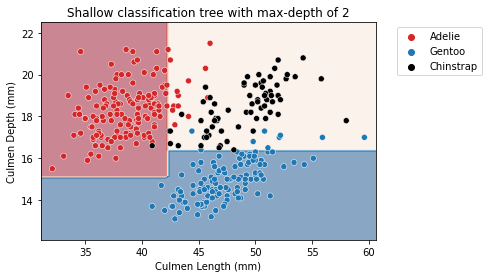

In [69]:
fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_column
)

_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

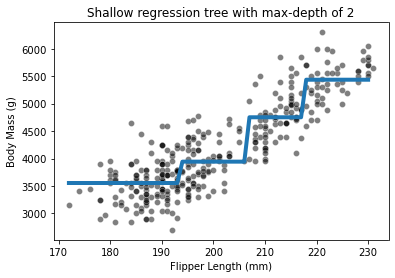

In [70]:
fit_and_plot_regression(
    tree_reg,
    data_reg,
    data_reg_columns,
    target_reg_column
)

_ = plt.title(f"Shallow regression tree with max-depth of {max_depth}")

In [71]:
# Now, let's increase the `max_depth` parameter value to check the 
# difference by observing the decision function.

max_depth = 30
tree_clf = DecisionTreeClassifier(
    max_depth=max_depth
)
tree_reg = DecisionTreeRegressor(
    max_depth=max_depth
)

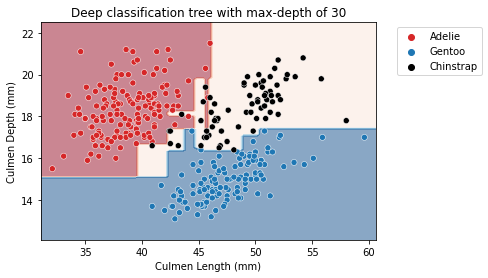

In [72]:
fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_column
)

_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

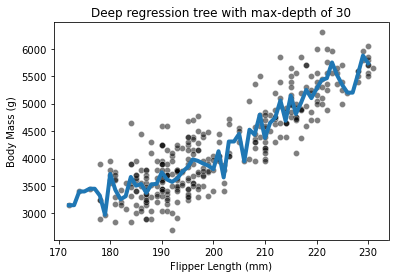

In [73]:
fit_and_plot_regression(
    tree_reg,
    data_reg,
    data_reg_columns,
    target_reg_column
)

_ = plt.title(f"Deep regression tree with max-depth of {max_depth}")

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": np.arange(2, 10, 1)
}

tree_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid
)

tree_reg = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid=param_grid
)

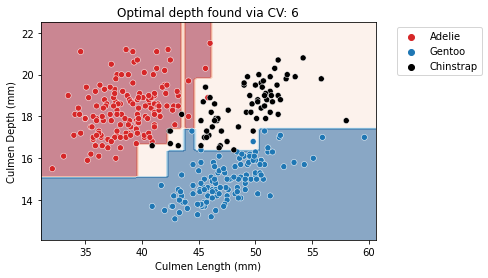

In [75]:
fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_column
)

_ = plt.title(f"Optimal depth found via CV: "
              f"{tree_clf.best_params_['max_depth']}")

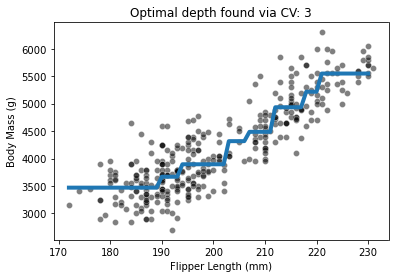

In [76]:
fit_and_plot_regression(
    tree_reg,
    data_reg,
    data_reg_columns,
    target_reg_column
)

_ = plt.title(f"Optimal depth found via CV: "
              f"{tree_reg.best_params_['max_depth']}")

In [77]:
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

# Blobs that will be interlaced
X_1, y_1 = make_blobs(
    n_samples=300,
    centers=[[0, 0], [-1, -1]],
    random_state=0
)

# Blobs that will be easily separated
X_2, y_2 = make_blobs(
    n_samples=300,
    centers=[[3, 6], [7, 0]],
    random_state=0
)

X = np.concatenate(
    [X_1, X_2],
    axis=0
)

y = np.concatenate(
    [y_1, y_2]
)

data_clf = np.concatenate(
    [X, y[:, np.newaxis]],
    axis=1
)

data_clf = pd.DataFrame(
    data_clf,
    columns=data_clf_columns + [target_clf_column]
)

data_clf[target_clf_column] = data_clf[target_clf_column].astype(np.int32)

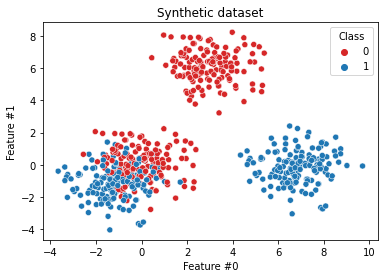

In [78]:
sns.scatterplot(
    data=data_clf,
    x=data_clf_columns[0],
    y=data_clf_columns[1],
    hue=target_clf_column,
    palette=["tab:red", "tab:blue"]
)

_ = plt.title("Synthetic dataset")

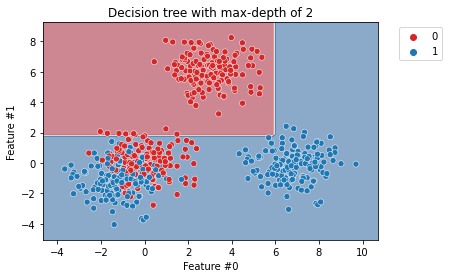

In [79]:
# We will first train a shallow decision tree with `max_depth=2`. 
# We would expect this depth to be enough to separate the blobs that are easy to separate.


max_depth = 2
tree_clf = DecisionTreeClassifier(
    max_depth=max_depth
)

fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_column
)

_ = plt.title(f"Decision tree with max-depth of {max_depth}")

**Note**

As expected, we see that the blue blob on the right and the red blob on the
top are easily separated. 
However, more splits will be required to better split the blob were both blue and red data points are mixed.

Indeed, we see that red blob on the top and the blue blob on the right of the plot are perfectly separated. 

However, the tree is still making mistakes in the area where the blobs are mixed together. Let's check the tree representation.

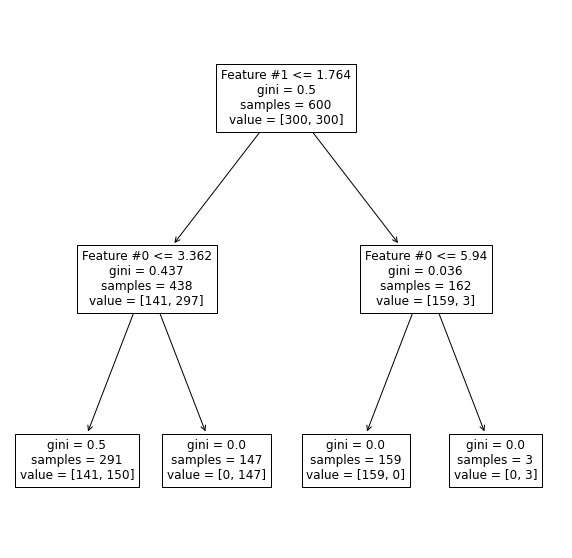

In [80]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(
    figsize=(10, 10)
)

_ = plot_tree(
    tree_clf,
    ax=ax,
    feature_names=data_clf_columns
)

# We see that the right branch achieves perfect classification. 
# Now, we increase the depth to check how the tree will grow.

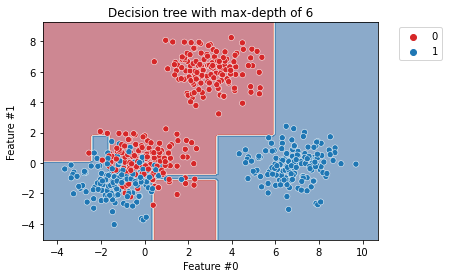

In [81]:
max_depth = 6
tree_clf = DecisionTreeClassifier(
    max_depth=max_depth
)

fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_column
)

_ = plt.title(
    f"Decision tree with max-depth of {max_depth}"
)

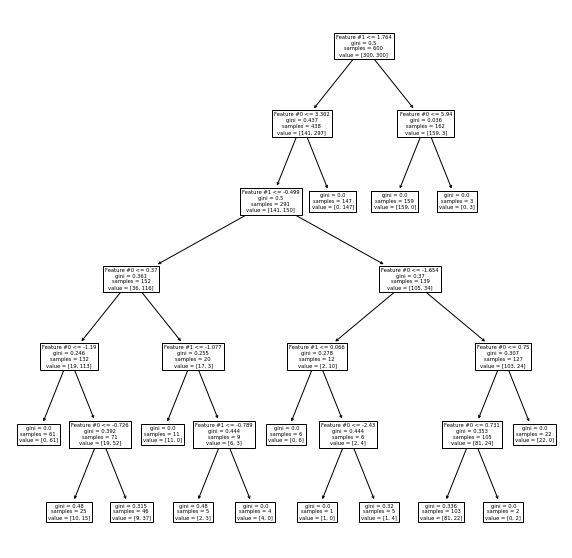

In [82]:
_, ax = plt.subplots(
    figsize=(10, 10)
)

_ = plot_tree(
    tree_clf,
    ax=ax,
    feature_names=data_clf_columns
)

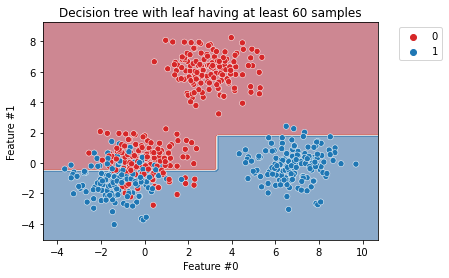

In [83]:
min_samples_leaf = 60

tree_clf = DecisionTreeClassifier(
    min_samples_leaf=min_samples_leaf
)

fit_and_plot_classification(
    tree_clf,
    data_clf,
    data_clf_columns,
    target_clf_column
)

_ = plt.title(
    f"Decision tree with leaf having at least {min_samples_leaf} samples"
)

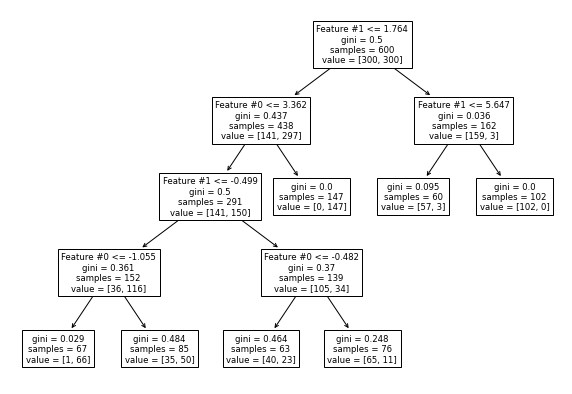

In [84]:
_, ax = plt.subplots(
    figsize=(10, 7)
)

_ = plot_tree(
    tree_clf,
    ax=ax,
    feature_names=data_clf_columns
)

#### QUIZ 4

**1. If a decision tree is overfitting, you need to increase the maximum depth.**

a) True

b) False

<br>

**2. How should you choose the maximum depth of a decision tree?**

a) choosing the depth maximizing the score on a validation set with a cross-validation, with a grid-search for instance

b) choosing the depth maximizing the score on the train set

c) choosing the depth maximizing the score on the test set
